# Biodata


- Nama : Kevin Winardi
- ID Dicoding : kevinwinardi
- Dataset : BBC News Archive (https://www.kaggle.com/datasets/hgultekin/bbcnewsarchive)

# Analisis dan memodifikasi data

### Mengimpor module

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Mengubah file csv menjadi dataframe

In [17]:
df = pd.read_csv("bbc-news-data.csv" , sep ="\t")
df.head()

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


Tidak ada duplikat data dan semuanya bertipe object

### Membuang kolom yang tidak digunakan

In [18]:
df = df.drop(columns = ["filename","title"])

### Mengecek info

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   content   2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


### One Hot Encoding

In [20]:
category = pd.get_dummies(df.category)
df = pd.concat([df,category],axis=1)
df = df.drop(columns = "category")
df.head(20)

,content,business,entertainment,politics,sport,tech
0,Quarterly profits at US media giant TimeWarne...,1,0,0,0,0
1,The dollar has hit its highest level against ...,1,0,0,0,0
2,The owners of embattled Russian oil giant Yuk...,1,0,0,0,0
3,British Airways has blamed high fuel prices f...,1,0,0,0,0
4,Shares in UK drinks and food firm Allied Dome...,1,0,0,0,0
5,Japan's economy teetered on the brink of a te...,1,0,0,0,0
6,The US created fewer jobs than expected in Ja...,1,0,0,0,0
7,"India, which attends the G7 meeting of seven ...",1,0,0,0,0
8,Ethiopia produced 14.27 million tonnes of cro...,1,0,0,0,0
9,A US government claim accusing the country's ...,1,0,0,0,0


# Machine Learning

## Callback

In [21]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      print("\nAkurasi telah mencapai > 90%!")
      self.model.stop_training = True
callbacks = myCallback()

## Dataframe ke array numpy

In [22]:
content = df['content'].values
label = df[['business','entertainment','politics', 'sport','tech']].values

## Menghilangkan stopwords

In [23]:
def remove_stopwords(text):
  words = word_tokenize(text)
  filtered_words = [word for word in words if word.lower() not in stopwords.words('english')]
  return ''.join(filtered_words)
df['content']=df['content'].apply(remove_stopwords)

## Menghapus tanda baca

In [24]:
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)
df['content'] = df['content'].apply(remove_punctuation)

## Membagi data latih dan data test

In [25]:
content_train,content_test, label_train,label_test = train_test_split(content,label,test_size = 0.2)

## Tokenizer

In [26]:
tokenizer = Tokenizer(num_words=5000, oov_token = "<oov>")
tokenizer.fit_on_texts(content_train)

## Padding dan sekuens

In [27]:
sequences_train = tokenizer.texts_to_sequences(content_train)
padded_train = pad_sequences(sequences_train)

sequences_test = tokenizer.texts_to_sequences(content_test)
padded_test = pad_sequences(sequences_test)

## Model

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Melatih Model

In [29]:
history = model.fit(padded_train, label_train, epochs=25, validation_data=(padded_test, label_test), callbacks=[callbacks], validation_split=0.2)

Epoch 1/25
56/56 [==============================] - 231s 4s/step - loss: 1.6009 - accuracy: 0.2506 - val_loss: 1.6168 - val_accuracy: 0.1910
Epoch 2/25
56/56 [==============================] - 226s 4s/step - loss: 1.5344 - accuracy: 0.3202 - val_loss: 1.3966 - val_accuracy: 0.4697
Epoch 3/25
56/56 [==============================] - 218s 4s/step - loss: 1.1185 - accuracy: 0.5191 - val_loss: 1.3002 - val_accuracy: 0.3596
Epoch 4/25
56/56 [==============================] - 219s 4s/step - loss: 1.0161 - accuracy: 0.5090 - val_loss: 1.0488 - val_accuracy: 0.4831
Epoch 5/25
56/56 [==============================] - 223s 4s/step - loss: 0.7968 - accuracy: 0.6309 - val_loss: 0.8515 - val_accuracy: 0.6090
Epoch 6/25
56/56 [==============================] - 221s 4s/step - loss: 0.6219 - accuracy: 0.7124 - val_loss: 0.8750 - val_accuracy: 0.6854
Epoch 7/25
56/56 [==============================] - 225s 4s/step - loss: 0.5515 - accuracy: 0.7618 - val_loss: 0.7940 - val_accuracy: 0.7011
Epoch 8/25
56

## Plot loss dan akurasi

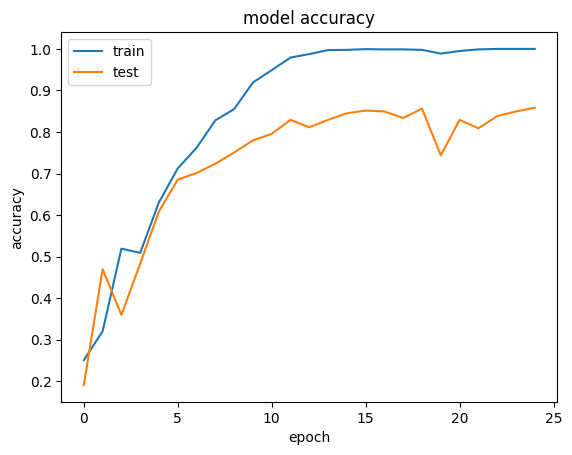

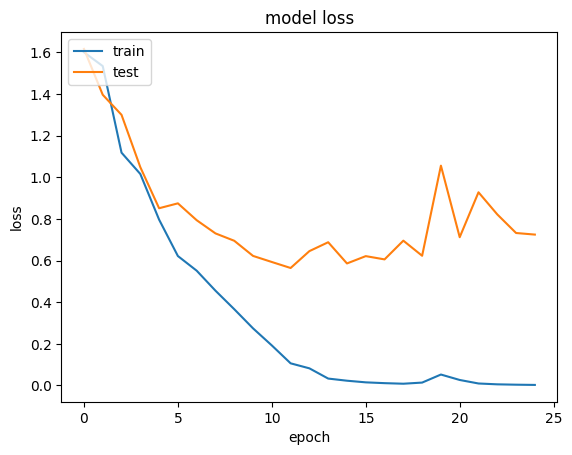

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()